In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

In [ ]:
#Lendo os dados

dados_vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/refs/heads/master/dados/relatorio_vendas.csv")

In [ ]:
dados_vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


Pergunta 1: Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região

In [ ]:
dados_vendas['data_pedido'] = pd.to_datetime(dados_vendas['data_pedido'], format = "%Y-%m-%d")
dados_vendas['data_envio'] = pd.to_datetime(dados_vendas['data_envio'], format = "%Y-%m-%d")


In [ ]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   datetime64[ns]
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [ ]:
#Criando df com os dados pedidos
vendas_cop = dados_vendas.copy()
vendas_cop = vendas_cop[['data_pedido', 'regiao', 'estado', 'vendas']]

#Gerando uma coluna que represente apenas os anos, puxando-os da coluna de pedidos
vendas_cop['ano'] = vendas_cop.data_pedido.dt.year

#Selecionando os dados do Centro-Oeste
vendas_cop = vendas_cop.query('regiao == "Centro-Oeste" and (ano == 2017 or ano == 2018)')
vendas_cop.drop(labels = ['data_pedido', 'regiao'], axis=1, inplace=True)

In [ ]:
#Criando tabela cruzada
vendas_copy_ano = pd.crosstab(index = vendas_cop.ano, columns = vendas_cop.estado,
                         values = vendas_cop.vendas, aggfunc = "sum")

vendas_copy_ano

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


In [ ]:
# Definindo a paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

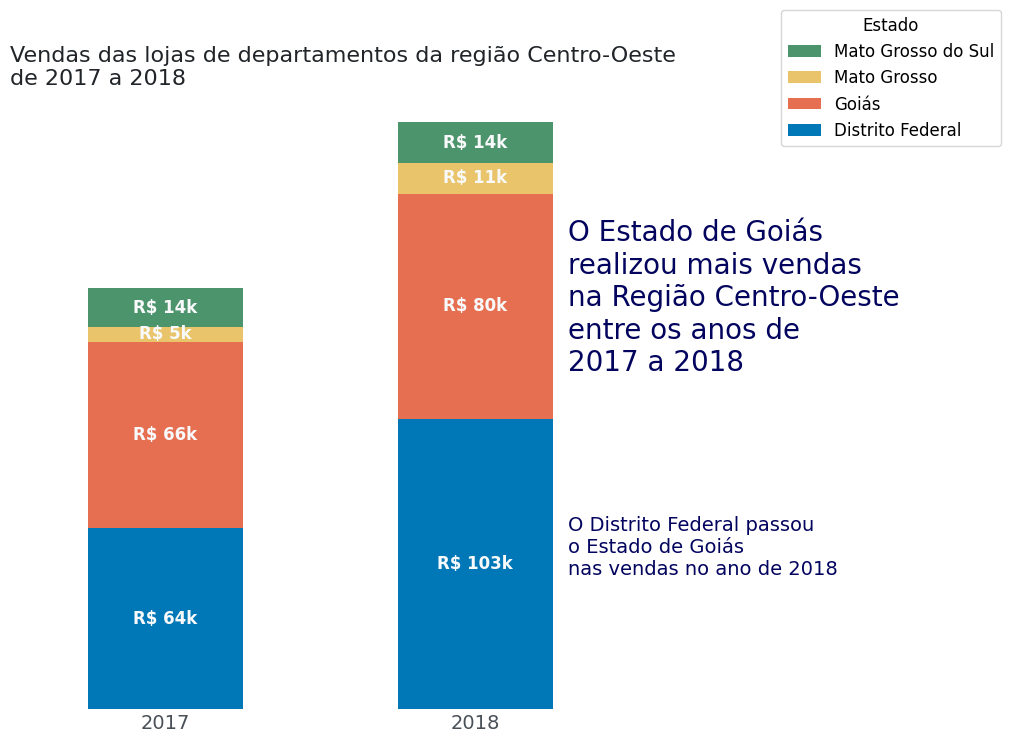

In [ ]:
def grafico_vendas_regiao():
  # Definindo as cores do gráfico
  cores = [AZUL2, VERMELHO1, AMARELO1, VERDE1, CINZA4]

  ax = vendas_copy_ano.plot(kind='bar', stacked=True, figsize=(8, 8), color=cores)

  # # Personalizando o gráfico
  ax.set_title('Vendas das lojas de departamentos da região Centro-Oeste\nde 2017 a 2018', loc='left', fontsize=16, color = CINZA1)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_yticklabels([])
  ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA2, rotation = 0)
  ax.set_frame_on(False)

  # remover todos os ticks do eixo x e y
  ax.tick_params(axis='both', which='both', length=0)

  # # Anotando uma conclusão no gráfico
  ax.text(1.3, 1.2e5, 'O Estado de Goiás\nrealizou mais vendas\nna Região Centro-Oeste\nentre os anos de\n2017 a 2018', fontsize=20, color=AZUL1, linespacing=1.2)
  ax.text(1.3, 4e4,
         'O Distrito Federal passou\no Estado de Goiás\nnas vendas no ano de 2018\n',
         fontsize=14,
         linespacing=1.2,
         color=AZUL1)
  # Personalizando a legenda
  ax.legend(bbox_to_anchor=(1.23,0.9), reverse = True, title = "Estado", title_fontsize = 12, fontsize = 12)

  # Adicionando os valores

  for container in ax.containers:
    labels = [f'R$ {valor.get_height()/1000:,.0f}k'.replace(",",".") for valor in container]
    ax.bar_label(container, label_type="center", labels = labels, size = 12, color = CINZA5, fontweight = "bold")

  fig = ax.get_figure()

  return ax
ax = grafico_vendas_regiao()

Pergunta 2: Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

In [ ]:
#Criando um df com os dados desejados
df_depart = dados_vendas.copy()
df_depart = df_depart[['departamento', 'modo_envio']]

#Criando uma table cruzada (crosstable) com a frequência de modos de envio por departamento
df_depart = pd.crosstab(index = df_depart.departamento, columns = df_depart.modo_envio, normalize='index')
df_depart

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [ ]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


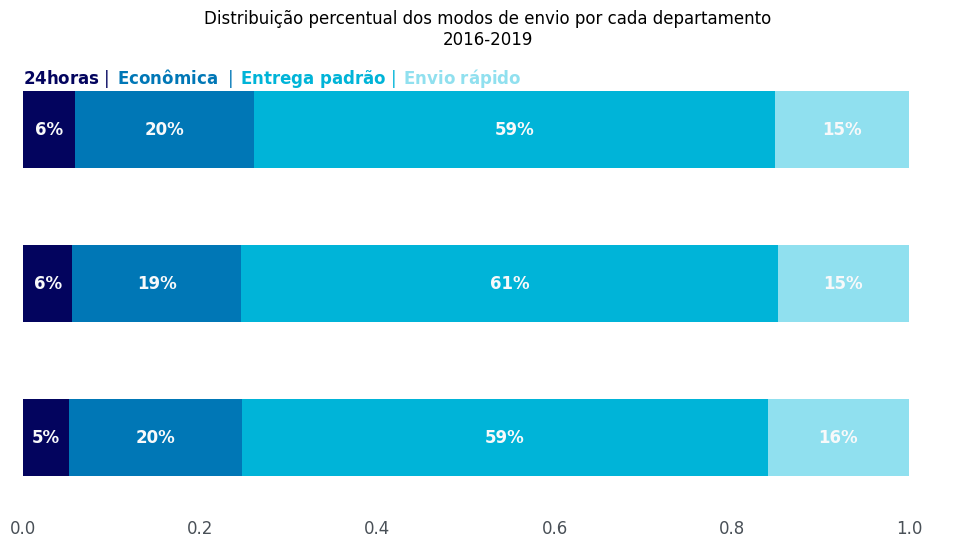

In [ ]:
#Definying the colors of graphic
cores = [AZUL1,AZUL2,AZUL3,AZUL4]

#Gerando o gráfico de barras empilhadas
ax = df_depart.plot(kind='barh', stacked=True, figsize=(12,6), color=cores, legend=False)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento\n2016-2019")


ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.set_frame_on(False)

#remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

#legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

#valores das barras
for container in ax.containers:
  labels = [f'{valor.get_width():.0%}' for valor in container]
  ax.bar_label(container, label_type="center", labels=labels, size=12, color=CINZA5, fontweight="bold")



---



#Unidade 3

###Desafio 1: Como estão as vendas por semestre no estado em que você mora ou que deseja conhecer? Destaque os valores máximos e mínimos de venda para apresentá-los ao seu público.



  Dica: Para agrupar os dados por semestre você pode utilizar a função resample da seguinte forma: resample(“2Q”, closed = “left”)


In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
df_estado = vendas.copy()
df_estado = df_estado.query('estado == "Bahia"')[["data_pedido", "vendas"]]

# Agrupando as vendas por final do semestre (2Q)
df_estado.set_index("data_pedido", inplace = True)
df_estado = df_estado.resample("2Q", closed="left").agg("sum")
df_estado = df_estado.reset_index()
df_estado.head()


<ipython-input-13-ddb8bd917ff1>:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_estado = df_estado.resample("2Q", closed="left").agg("sum")


,data_pedido,vendas
0,2016-06-30,48100.19
1,2016-12-31,84362.51
2,2017-06-30,25747.57
3,2017-12-31,43287.77
4,2018-06-30,47121.96


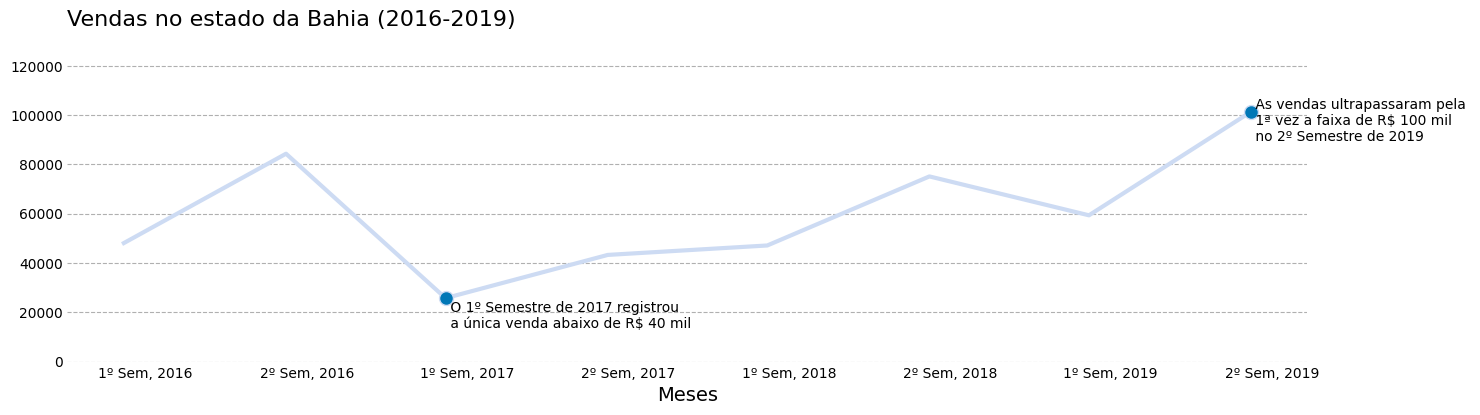

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(16,4))

# Resgatando o valor minimo, maximo das vendas
venda_min = df_estado.vendas.min()
venda_max = df_estado.vendas.max()
valores = df_estado.vendas.values

# Gerando a lista com os pontos a marcar (True apenas para mínimo e máximo)
pontos_a_marcar = list((valores == venda_min) | (valores == venda_max))

# Criando o gráfico de linha das vendas
ax.plot(df_estado["data_pedido"], df_estado["vendas"], lw = 3, color = AZUL5, marker = "o",
          markersize = 10, markerfacecolor = AZUL2, markevery =  pontos_a_marcar)

## Personalizando o gráfico
ax.set_title('Vendas no estado da Bahia (2016-2019)', fontsize = 16, loc='left', pad = 20)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis = "y", linestyle="--")
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Descrevendo o limite mínimo e máximo do eixo y
plt.ylim(0, 1.25e5)

# Definindo o intervalo semestral para os dados
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [6,12]))
labels = ["1º Sem, 2016", "2º Sem, 2016", "1º Sem, 2017", "2º Sem, 2017",
          "1º Sem, 2018", "2º Sem, 2018", "1º Sem, 2019", "2º Sem, 2019"]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels, ha = "left")

# Escrevendo texto nos pontos de destaque
for x, y in zip(df_estado.data_pedido, df_estado.vendas):
  if y == venda_min:
    ax.text(x, y = y - 1.2e4, s = f" O 1º Semestre de 2017 registrou \n a única venda abaixo de R$ 40 mil", fontsize = 10)
  if y == venda_max:
    ax.text(x, y = y - 1.2e4, s = f" As vendas ultrapassaram pela \n 1ª vez a faixa de R$ 100 mil \n no 2º Semestre de 2019", fontsize = 10)

plt.show()


Desafio 2: Compare os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

   Sugestão: No Desafio 2, utilize o Plotly para possibilitar ao usuário a escolha entre linhas que deseja visualizar.


In [ ]:
# Importando as bibliotecas
import pandas as pd
import plotly.express as px

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
df_ne = vendas.copy()
df_ne = df_ne.query("regiao == 'Nordeste'")[["estado","data_pedido", "lucro"]]


In [ ]:
#Criando tabela cruzada
df_estado_ne = pd.crosstab(index = df_ne.data_pedido, columns = df_ne.estado,
                         values = df_ne.lucro, aggfunc = "sum")
#Agrupar lucros por ano
df_estado_ne = df_estado_ne.resample('Y').agg('sum')
df_estado_ne = round(df_estado_ne/1e3, 2)
df_estado_ne

<ipython-input-16-4266c8952515>:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_estado_ne = df_estado_ne.resample('Y').agg('sum')


estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


Por que usar resample()?

  O método resample() é projetado especificamente para dados com um índice de data/hora (DatetimeIndex).
  Ele ajusta a granularidade dos dados agrupando-os por períodos de tempo (por exemplo, ano 'Y', mês 'M', dia 'D').
   Mantém a informação de que os dados são temporais e permite operações como preenchimento de valores ausentes (ffill(), bfill()).
   É útil quando queremos alterar a frequência dos dados (agregando ou interpolando).

In [ ]:
#Gerando o gráfico
fig = px.line(df_estado_ne, x = df_estado_ne.index, y = df_estado_ne.columns,
              markers = True, labels={"estado": "Estado"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3, AZUL5,
                                       LARANJA1, CINZA1, AZUL4])
fig.update_layout(width=1300, height=600, font_family="DejaVu Sans", font_size=15,
                  font_color=CINZA2, title_font_color=CINZA1, title_font_size=24,
                  title_text="Lucros das lojas de departamentos por ano na Região Nordeste" +
                  '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='',plot_bgcolor=CINZA5)

# Ajustando os ticks do eixo y para o formato em milhar
fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

# Ajustando o eixo x com os labels dos anos
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals=df_estado_ne.index)

# Dados ao passar o mouse (hover)
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}")

fig.show()

#Unidade 4

Desafio 1: Baixe a base de dados com as amostras das idades dos moradores do município de Cidade Alegre e crie os histogramas de colunas e de linha lado a lado, buscando interpretar as diferenças entre eles e o que podem representar separadamente. Adicione também uma linha que define a mediana da distribuição no histograma de linha e escreva o valor dessa medida no gráfico.

  Dica 1: Para desenhar os gráficos separados, utilize a mesma ideia que executamos no gráfico de barras empilhadas: fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(largura, altura)).

  Dica 2: E, para desenhar 2 ou mais gráficos no seaborn, precisamos passar um parâmetro ax para a função de desenho do visual, por exemplo, sns.barplot(ax = axs[0], …)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dados = pd.read_csv("/content/drive/MyDrive/Alura/DataScience/Avançando em Data Science com Python/Data VIsualization: Gráficos de Comparação e Distribuição/pop_idade.csv")
dados


,idade
0,39
1,33
2,41
3,50
4,32
...,...
495,40
496,24
497,33
498,26


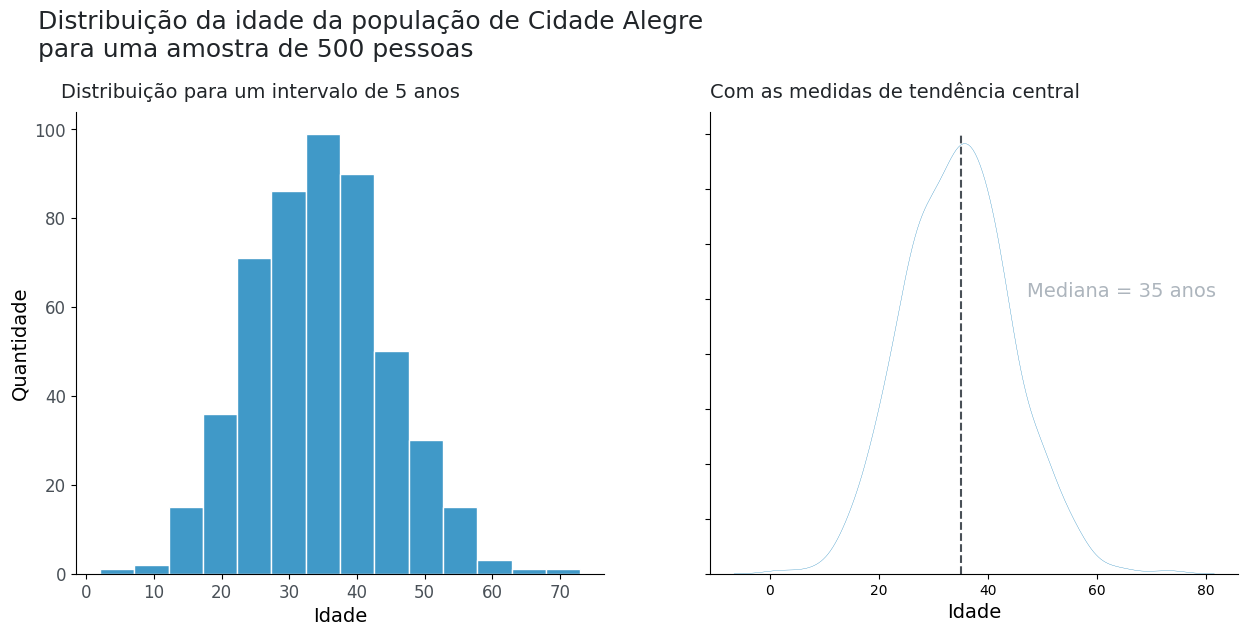

In [ ]:
#Gerando o gráfico
fig, axs = plt.subplots(1, 2, figsize=(15, 6)) # creating a figure with 2 subplots
sns.set_theme(style='white')

# Título dos gráficos
fig.suptitle("Distribuição da idade da população de Cidade Alegre \npara uma amostra de 500 pessoas",
             fontsize=18, color=CINZA1, x = 0.1, y = 1.05, ha="left")

#Gráfico 1 - Histograma de colunas
sns.histplot(ax=axs[0], data=dados, x='idade', binwidth=5, color=AZUL2) # plotting on the first subplot
axs[0].set_title('Distribuição para um intervalo de 5 anos', size=14, color=CINZA1, x = 0.35,  pad = 10) # setting title for the first subplot
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[0].xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

#Gráfico 2 - Histograma de linhas
sns.kdeplot(ax=axs[1], data=dados, x='idade', color=AZUL2,lw=0.21) # plotting on the second subplot
axs[1].set_title('Com as medidas de tendência central', size=14, color=CINZA1, x = 0.35,  pad = 10) # setting title for the second subplot
axs[1].set_xlabel('Idade', fontsize = 14)
axs[1].set_ylabel('')
axs[1].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[1].set_yticklabels([])
sns.despine()


#Gerando a linha da mediana
# gerando 1 ou mais linhas na vertical a partir de um valor de x
axs[1].vlines(x= dados.idade.median(), ymin= 0, ymax= 0.04, colors = CINZA2, linestyles='--')
axs[1].text(0.6, 0.6, f'Mediana = {int(dados.idade.median())} anos', fontsize=14, color = CINZA3, transform=axs[1].transAxes)

plt.show()

Desafio 2: Represente no boxplot dos volumes do amaciante os limites superiores e inferiores do diagrama de caixa. Comente sobre o resultado encontrado ao desenhar esses limites no boxplot.

  Dica: Para conseguir definir os limites superiores e inferiores, calcule o intervalo interquartil dos dados e, logo em seguida, cada um dos limites, seguindo as fórmulas do Faça como eu fiz: elementos de um boxplot.


In [ ]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/volume_amaciante.csv")


(1000, 1)

Text(50, 0, '1º quartil/ 25%')

/usr/local/lib/python3.11/dist-packages/matplotlib/text.py:1477: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



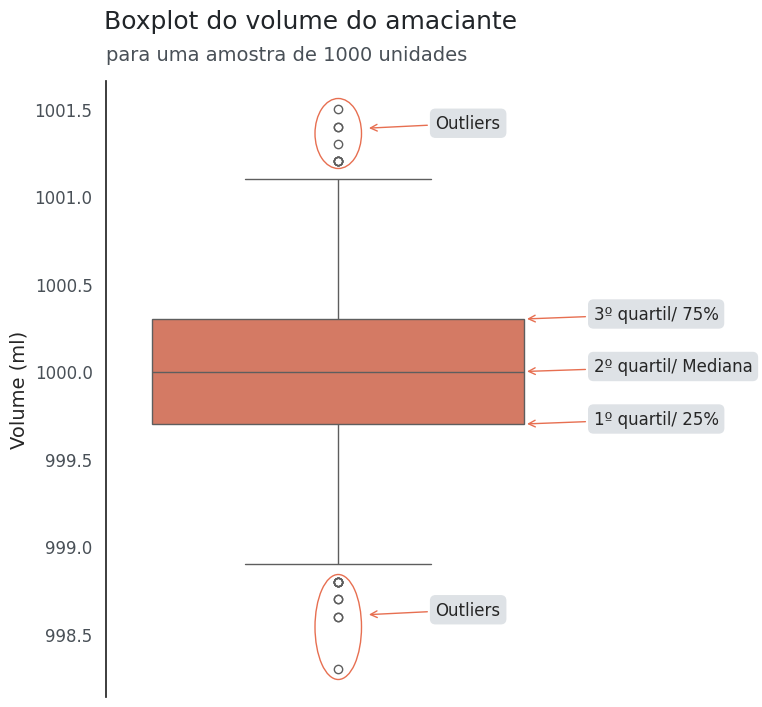

In [ ]:
#Criando a figura
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

#Gerando o gráfico
ax = sns.boxplot(data=vol_amaciante, y='Volume', color=VERMELHO1, orient='v')


## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)


#Gerando os comentários
y_min, y_max = ax.get_ybound()

outlier_sup = Ellipse((0, y_max - 0.3), width=0.1, height=0.4, fill=False, color=VERMELHO1)
outlier_inf = Ellipse((0, y_min + 0.4), width=0.1, height=0.6, fill=False, color=VERMELHO1)
ax.add_patch(outlier_sup)
ax.add_patch(outlier_inf)


#Interpretações                                                           #position
#annotate(<nome>, <valor xy(>), <xycoords>, <bbox=<boxstyle>, <fc>, <ec> >, <xytext>, <textcoords>, <arrowprops>)
ax.annotate("Outliers", xy=(0 + 0.06, y_max - 0.27), xycoords="data", bbox=dict(boxstyle="round", fc=CINZA, ec=CINZA),
            xytext=(50,0), textcoords="offset points", arrowprops=dict(arrowstyle="->", color=VERMELHO1))

ax.annotate("Outliers", xy=(0 + 0.06, y_min + 0.47), xycoords="data", bbox=dict(boxstyle="round", fc=CINZA, ec=CINZA),
            xytext=(50,0), textcoords="offset points", arrowprops=dict(arrowstyle="->", color=VERMELHO1))

ax.annotate("2º quartil/ Mediana", xy=(0.4, vol_amaciante.median()), xycoords="data", bbox=dict(boxstyle="round", fc=CINZA, ec=CINZA),
            xytext=(50,0), textcoords="offset points", arrowprops=dict(arrowstyle="->", color=VERMELHO1))


ax.annotate("3º quartil/ 75%", xy=(0.4, vol_amaciante.quantile(.75)), xycoords="data", bbox=dict(boxstyle="round", fc=CINZA, ec=CINZA),
            xytext=(50,0), textcoords="offset points", arrowprops=dict(arrowstyle="->", color=VERMELHO1))


ax.annotate("1º quartil/ 25%", xy=(0.4, vol_amaciante.quantile(.25)), xycoords="data", bbox=dict(boxstyle="round", fc=CINZA, ec=CINZA),
            xytext=(50,0), textcoords="offset points", arrowprops=dict(arrowstyle="->", color=VERMELHO1))


#Unidade 5

Desafio 1: Baixe a base de dados com as notas das turmas de Data Visualization e crie o violinplot, buscando interpretar as diferenças entre cada uma delas e documentando os seus achados. Sinta-se livre para adicionar alguns dos recursos que aprendemos ao longo do curso, como anotações, textos e figuras.

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

notas = pd.read_csv("/content/drive/MyDrive/Alura/DataScience/Avançando em Data Science com Python/Data VIsualization: Gráficos de Comparação e Distribuição/notas.csv")
notas.head()


,Turma,Nota
0,Turma 1,79
1,Turma 1,73
2,Turma 1,80
3,Turma 1,88
4,Turma 1,72


<ipython-input-105-d7db66940579>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




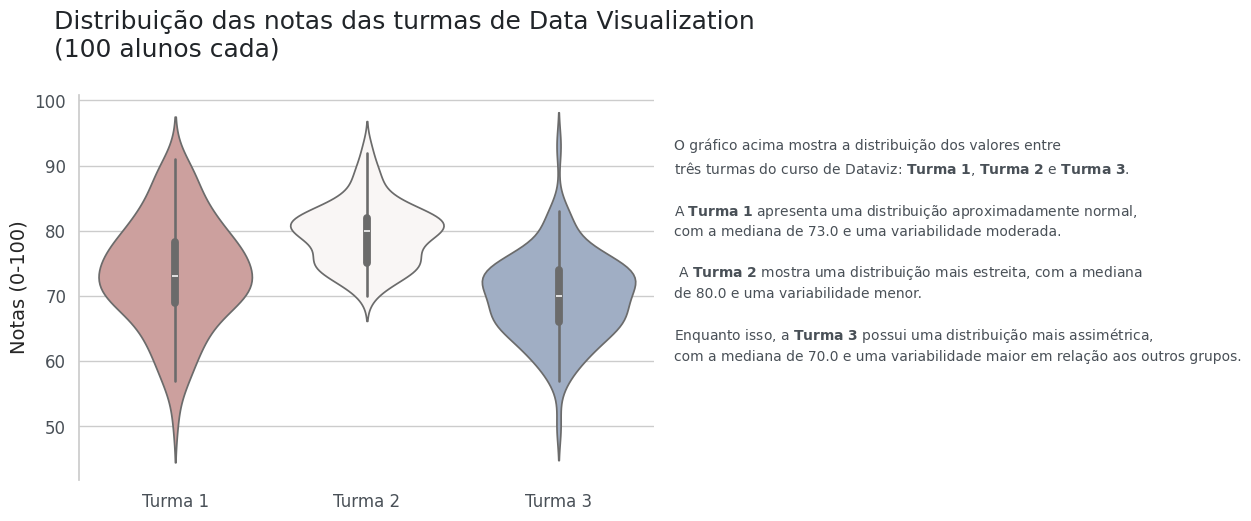

In [105]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
fig.subplots_adjust(right = 0.7)
sns.set_theme(style="whitegrid")

# Gerando o violinplot das notas
ax = sns.violinplot(data = notas, x = "Turma", y = "Nota", palette = "vlag_r")

# Personalizando o gráfico
plt.suptitle('Distribuição das notas das turmas de Data Visualization\n(100 alunos cada)', size=18, color=CINZA1, ha = 'left', x = 0.1, y = 1.05)
ax.set_xlabel('')
ax.set_ylabel('Notas (0-100)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Criando uma lista com as medianas de cada turma
mediana = []
for i in range(1,4):
  mediana.append(notas.query(f"Turma == 'Turma {i}'").Nota.median())

# Texto explicativo
ax.text(2.6, 60,
         'O gráfico acima mostra a distribuição dos valores entre\n'
         'três turmas do curso de Dataviz: $\\bf{Turma\ 1}$, $\\bf{Turma\ 2}$ e $\\bf{Turma\ 3}$.\n\n'
         'A $\\bf{Turma\ 1}$ apresenta uma distribuição aproximadamente normal,\n'
         f'com a mediana de {mediana[0]} e uma variabilidade moderada.\n\n'
         ' A $\\bf{Turma\ 2}$ mostra uma distribuição mais estreita, com a mediana\n'
         f'de {mediana[1]} e uma variabilidade menor.\n\n'
         'Enquanto isso, a $\\bf{Turma\ 3}$ possui uma distribuição mais assimétrica,\n'
         f'com a mediana de {mediana[2]} e uma variabilidade maior em relação aos outros grupos.',
         fontsize=10, linespacing=1.45, color=CINZA2)

plt.show()



Desafio 2: Para o primeiro desafio vamos selecionar os dados de comprimento e largura da amostra B e desenhar o gráfico de dispersão. Vamos também adicionar as linhas de rejeição em nosso gráfico.

In [106]:
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_medidas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")
df_b = df_medidas.query('amostra == "B"')[["comprimento", "largura"]]

df_b.head()


,comprimento,largura
200,19.97,5.10
201,20.13,4.94
202,20.12,4.95
203,20.04,4.96
204,19.97,4.98


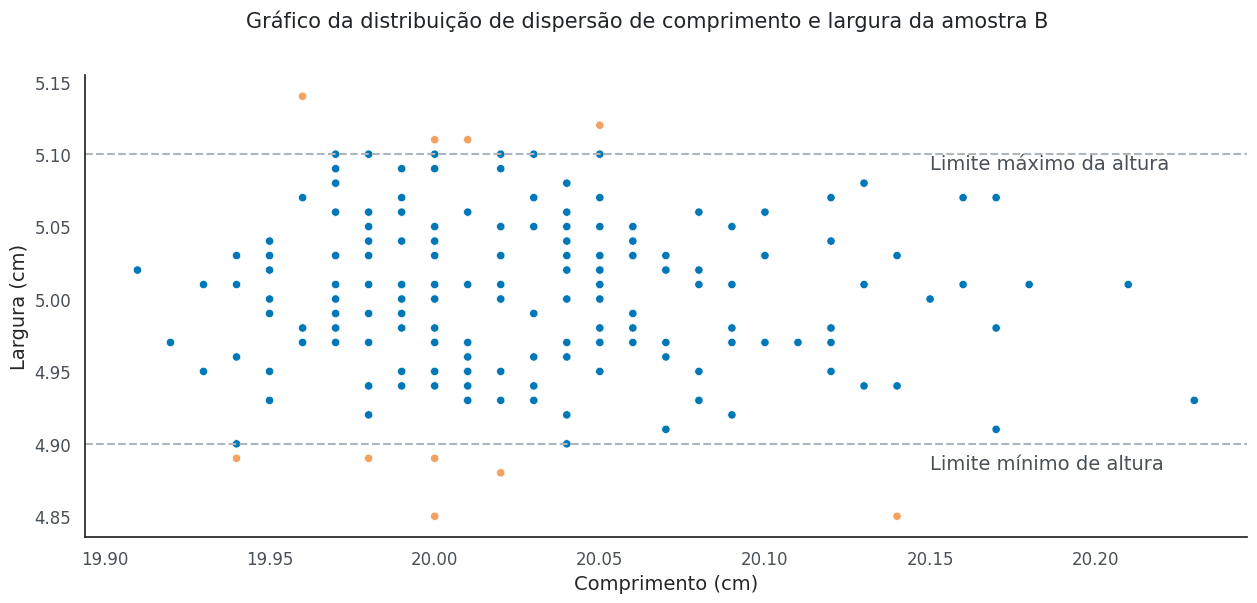

In [170]:
#Criando a figura
fig, ax = plt.subplots(figsize=(15,6))
sns.set_theme(style='white')

# Definindo as cores do gráfico e a porcentagem de rejeição
cores = [VERMELHO1, LARANJA1, AZUL2]
pct = 0.02

#Rejeita e aprova
# Mapeando as cores para a faixa requisitada (2%)
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_b["comprimento"]]
rejeita_larg = [True if (a > 5*(1+pct) or a < 5*(1-pct)) else False for a in df_b["largura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_larg, cores[1], cores[2]))

# Gerando o gráfico de dispersão
ax = sns.scatterplot(data = df_b, x="comprimento", y = "largura", color = map_cores)


# Personalizando o gráfico
plt.suptitle('Gráfico da distribuição de dispersão de comprimento e largura da amostra B', color=CINZA1, x = 0.5, y = 0.99, size=15)
ax.set_xlabel('Comprimento (cm)', fontsize = 14)
ax.set_ylabel('Largura (cm)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

### Desenhando as linhas verticais com os limites mínimos e máximo de largura desejada
ax.text(20.15, 5.1,"Limite máximo da altura", fontsize=14, color=CINZA2, va='top')
plt.axhline(y = 5 * (1 + pct), color = CINZA3, linestyle='--')
ax.text(20.15, 4.88, "Limite mínimo de altura", fontsize=14, color=CINZA2, va='bottom')
plt.axhline(y = 5 * (1-pct), color = CINZA3, linestyle='--')


###
#plt.axhline(y=<(posicao)* (1 - pct), <xmin = (define valor)>, <xmax= (puxar do df a coluna desejada)>, <color>, <linestyle>)

plt.show()